In [3]:
!pip install numpy pandas matplotlib seaborn

In [ ]:
#Data source: https://www.kaggle.com/daverosenman/nba-finals-team-stats


#The following are questions that will guide the project:

#1. Does the home team win more often compared to the away team in the NBA finals games?

#2. Does home court advantage lead to improvements in team statistics in comparison to the away team statistics? 

#3. Has the performance of the NBA finals teams at home changed over time? 



In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

#import each dataset
nbaChampion = pd.read_csv (r'C:\Users\andre\Downloads\NBA Finals Data\championsdata.csv')

nbaRunnerUp = pd.read_csv (r'C:\Users\andre\Downloads\NBA Finals Data\runnerupsdata.csv')

#first taking a look at the champion data
nbaChampion

#examine the columns and the data types
nbaChampion.dtypes

#check for null value
nbaChampion.isna().sum()

#Now taking a look at the runner up data
nbaRunnerUp

#examine the columns and the data types
nbaRunnerUp.dtypes

#check for null value
nbaRunnerUp.isna().sum()

Year    0
Team    0
Game    0
Win     0
Home    0
MP      0
FG      0
FGA     0
FGP     0
TP      0
TPA     0
TPP     3
FT      0
FTA     0
FTP     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
dtype: int64

In [18]:
#To get rid of NA values, we will change the three point percentage to 0
nbaChampion['TPP'] = nbaChampion['TPP'].fillna(0)
nbaChampion.isna().sum()

#Make sure NA values changed to 0
checkNull = nbaChampion[nbaChampion['TPA'] == 0]
checkNull[['TPA', 'TPP']]

#Now the same for the runner up data 
nbaRunnerUp['TPP'] = nbaRunnerUp['TPP'].fillna(0)
nbaRunnerUp.isna().sum()

#Make sure NA values changed to 0
checkNull = nbaRunnerUp[nbaRunnerUp['TPA'] == 0]
checkNull[['TPA', 'TPP']]

print(nbaChampion.shape)
print(nbaRunnerUp.shape)

(220, 24)
(220, 24)


In [5]:
#checking the variables to find the ones that help the team win the most before changing Win/Loss and Home/Away values
#These will be used to help represent team success
nbaRunnerUp.corr()
nbaChampion.corr()

,Year,Game,Win,Home,MP,FG,FGA,FGP,TP,TPA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Year,1.000000,-0.013034,0.018865,0.017833,0.038076,-0.384162,-0.351961,-0.189437,0.765864,0.826494,...,0.013352,-0.375680,0.141763,-0.162384,-0.366905,-0.120682,-0.060679,-0.295238,-0.246790,-0.210735
Game,-0.013034,1.000000,0.096004,-0.154457,-0.112216,-0.105332,-0.082260,-0.062538,0.039666,0.025935,...,-0.004889,0.018762,-0.053816,-0.027145,-0.126379,-0.006437,-0.133452,-0.020670,0.124912,-0.039981
Win,0.018865,0.096004,1.000000,0.226008,-0.115526,0.242698,-0.070503,0.418776,0.036517,-0.085514,...,0.207009,-0.091179,0.401033,0.237150,0.208196,0.131785,0.092909,-0.224392,-0.146904,0.395008
Home,0.017833,-0.154457,0.226008,1.000000,0.064854,0.148059,0.080108,0.122578,0.028553,0.026015,...,0.024942,0.045662,0.302585,0.260986,0.234745,0.022109,0.102567,-0.058148,-0.148750,0.192108
MP,0.038076,-0.112216,-0.115526,0.064854,1.000000,0.182213,0.377379,-0.094893,0.072193,0.067871,...,0.006539,0.159941,0.004993,0.118427,0.055988,0.073683,0.020606,0.028306,0.160658,0.156821
FG,-0.384162,-0.105332,0.242698,0.148059,0.182213,1.000000,0.717653,0.716452,-0.161134,-0.301150,...,0.067563,0.214147,0.097367,0.226968,0.726910,0.260889,0.115427,0.033195,0.276572,0.844687
FGA,-0.351961,-0.082260,-0.070503,0.080108,0.377379,0.717653,1.000000,0.034344,-0.183846,-0.191084,...,0.057074,0.600364,0.068712,0.482227,0.469553,0.264415,0.094237,0.013656,0.335417,0.552078
FGP,-0.189437,-0.062538,0.418776,0.122578,-0.094893,0.716452,0.034344,1.000000,-0.034193,-0.232673,...,0.044093,-0.289214,0.063192,-0.159667,0.567209,0.115858,0.062885,0.032326,0.070499,0.664525
TP,0.765864,0.039666,0.036517,0.028553,0.072193,-0.161134,-0.183846,-0.034193,1.000000,0.888239,...,-0.001108,-0.363377,0.068601,-0.208753,-0.058553,-0.080939,-0.088313,-0.278003,-0.157905,0.066088
TPA,0.826494,0.025935,-0.085514,0.026015,0.067871,-0.301150,-0.191084,-0.232673,0.888239,1.000000,...,0.003024,-0.300144,0.066792,-0.164787,-0.212537,-0.108574,-0.093788,-0.286712,-0.154606,-0.111820


In [6]:
#Changing 0's and 1's to Loss and Win, and Away and Home
nbaChampion['Win'] = nbaChampion['Win'].replace([1], 'Win')
nbaChampion['Win'] = nbaChampion['Win'].replace([0], 'Loss')

nbaChampion['Home'] = nbaChampion['Home'].replace([1], 'Home')
nbaChampion['Home'] = nbaChampion['Home'].replace([0], 'Away')

nbaRunnerUp['Win'] = nbaRunnerUp['Win'].replace([1], 'Win')
nbaRunnerUp['Win'] = nbaRunnerUp['Win'].replace([0], 'Loss')

nbaRunnerUp['Home'] = nbaRunnerUp['Home'].replace([1], 'Home')
nbaRunnerUp['Home'] = nbaRunnerUp['Home'].replace([0], 'Away')

#############################
print(" ")
print("***")
print(" ")
#############################

#Getting the count for home wins
h_w = 0
for index, row in nbaChampion.iterrows():
    if row[3] == "Win":
        if row[4] == "Home":
            h_w = h_w + 1
            
print(h_w)

#Getting the count for home losses
h_l = 0
for index, row in nbaChampion.iterrows():
    if row[3] == "Loss":
        if row[4] == "Home":
            h_l = h_l + 1
            
print(h_l) 

#Getting the count for away wins
a_w = 0
for index, row in nbaChampion.iterrows():
    if row[3] == "Win":
        if row[4] == "Away":
            a_w = a_w + 1
            
print(a_w) 

#Getting the count for away losses
a_l = 0
for index, row in nbaChampion.iterrows():
    if row[3] == "Loss":
        if row[4] == "Away":
            a_l = a_l + 1

print(a_l)

print(h_w + h_l + a_w + a_l)


#############################
print(" ")
print("***")
print(" ")
#############################

#Calculating percentages for the counts
h_w = h_w/111
h_l = h_l/111
a_w = a_w/109
a_l = a_l/109

print("Home win pct: " + str(h_w))
print("Home loss pct: " + str(h_l))
print("Away win pct: " + str(a_w))
print("Away loss pct: " + str(a_l))
print(h_w + h_l) 
print(a_w + a_l)


#############################
print(" ")
print("***")
print(" ")
#############################


#Getting the 2nd place count for home wins
h_w2 = 0
for index, row in nbaRunnerUp.iterrows():
    if row[3] == "Win":
        if row[4] == "Home":
            h_w2 = h_w2 + 1
            
print(h_w2)

#Getting the count for home losses
h_l2 = 0
for index, row in nbaRunnerUp.iterrows():
    if row[3] == "Loss":
        if row[4] == "Home":
            h_l2 = h_l2 + 1
            
print(h_l2) 

#Getting the count for away wins
a_w2 = 0
for index, row in nbaRunnerUp.iterrows():
    if row[3] == "Win":
        if row[4] == "Away":
            a_w2 = a_w2 + 1
            
print(a_w2) 

#Getting the count for away losses
a_l2 = 0
for index, row in nbaRunnerUp.iterrows():
    if row[3] == "Loss":
        if row[4] == "Away":
            a_l2 = a_l2 + 1

print(a_l2)

print(h_w2 + h_l2 + a_w2 + a_l2)

#############################
print(" ")
print("***")
print(" ")
#############################

#calculating percentages for the counts
h_w2 = h_w2/109
h_l2 = h_l2/109
a_w2 = a_w2/111
a_l2 = a_l2/111

print("2nd Home win pct: " + str(h_w2))
print("2nd Home loss pct: " + str(h_l2))
print("2nd Away win pct: " + str(a_w2))
print("2nd Away loss pct: " + str(a_l2))
print(h_w2 + h_l2) 
print(a_w2 + a_l2)



 
***
 
90
21
66
43
220
 
***
 
Home win pct: 0.8108108108108109
Home loss pct: 0.1891891891891892
Away win pct: 0.6055045871559633
Away loss pct: 0.3944954128440367
1.0
1.0
 
***
 
43
66
20
91
220
 
***
 
2nd Home win pct: 0.3944954128440367
2nd Home loss pct: 0.6055045871559633
2nd Away win pct: 0.18018018018018017
2nd Away loss pct: 0.8198198198198198
1.0
1.0


[None, None]

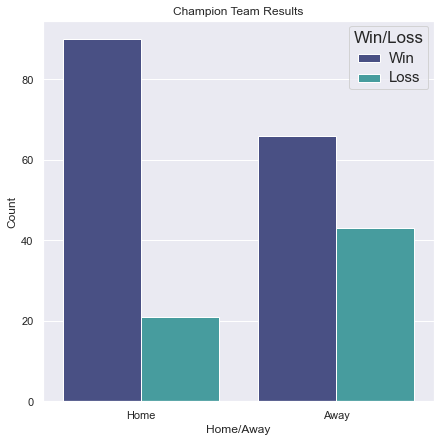

In [7]:
#Bar graph for win/loss count
sns.set(rc={"figure.figsize":(7,7)}) 
sns.set_theme(style="darkgrid")
w_plt = sns.countplot(x="Home", hue="Win", data=nbaChampion, palette = "mako")
w_plt.set(xlabel='Home/Away', ylabel='Count')
plt.legend(title="Win/Loss", labels=["Win", "Loss"])
plt.title("Champion Team Results")    
plt.setp(w_plt.get_legend().get_texts(), fontsize='15') 
plt.setp(w_plt.get_legend().get_title(), fontsize='17') 

[None, None]

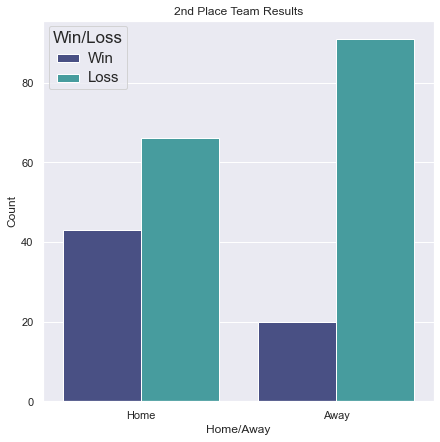

In [8]:
#Bar graph for win/loss count
sns.set_theme(style="darkgrid")
l_plt = sns.countplot(x="Home", hue="Win", hue_order=["Win", "Loss"], data=nbaRunnerUp, order=["Home", "Away"], 
                     palette = "mako")
l_plt.set(xlabel='Home/Away', ylabel='Count')
plt.legend(title="Win/Loss")
plt.title("2nd Place Team Results")
plt.setp(l_plt.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(l_plt.get_legend().get_title(), fontsize='17') # for legend title

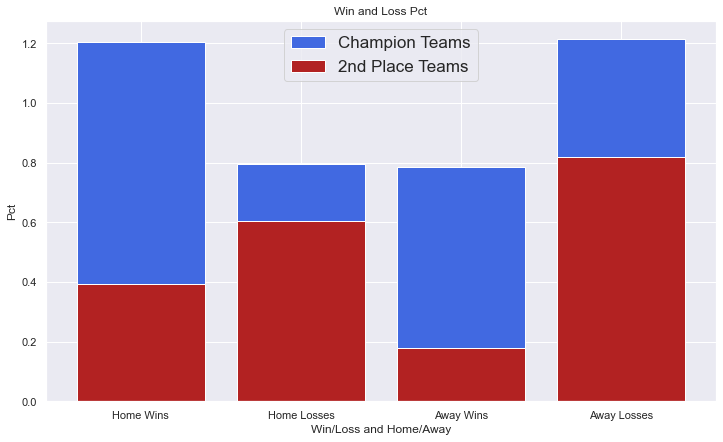

In [9]:
#Stacked bar graph with win/loss pct, both champion and 2nd place values
sns.set(rc={"figure.figsize":(12,7)}) 
x= ["Home Wins", "Home Losses", "Away Wins", "Away Losses"]
y1 =[h_w, h_l, a_w, a_l]
y2 =[h_w2, h_l2, a_w2, a_l2]

plt.bar(x, y1, color=['royalblue', 'royalblue', 'royalblue', 'royalblue'], label="Champion Teams", bottom=y2)
plt.bar(x, y2, color=['firebrick', 'firebrick', 'firebrick', 'firebrick'], label="2nd Place Teams")
plt.title("Win and Loss Pct")

plt.xlabel("Win/Loss and Home/Away")
plt.ylabel("Pct")
plt.legend(title = "Teams")
plt.legend(prop={'size': 17})
plt.show()

Text(0.5, 1.0, 'Champion Team Results')

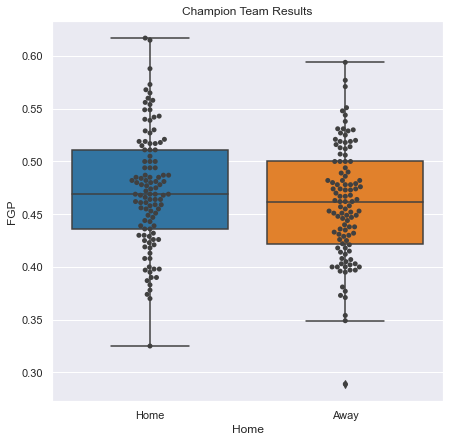

In [10]:
#Box plot of fgp
sns.set(rc={"figure.figsize":(7,7)}) 
sns.set_theme(style="darkgrid")
fgp = sns.boxplot(x="Home", y= "FGP", data=nbaChampion, palette = "tab10" )
fgp = sns.swarmplot(x="Home", y="FGP", data=nbaChampion, color=".25")
l_plt.set(xlabel='Home/Away', ylabel='Count')
plt.title("Champion Team Results")

Text(0.5, 1.0, '2nd Place Team Results')

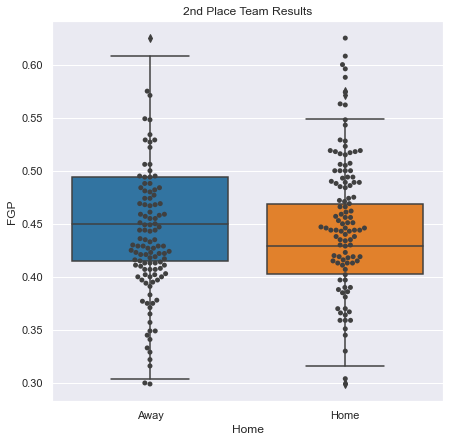

In [11]:
#Box plot of fgp
sns.set_theme(style="darkgrid")
fgp2 = sns.boxplot(x="Home", y= "FGP", data=nbaRunnerUp, palette = "tab10", order=["Home", "Away"])
fgp2 = sns.swarmplot(x="Home", y="FGP", data=nbaRunnerUp, color=".25")
l_plt.set(xlabel='Home/Away', ylabel='Count')
plt.title("2nd Place Team Results")

Text(0.5, 1.0, 'Champion Team Results')

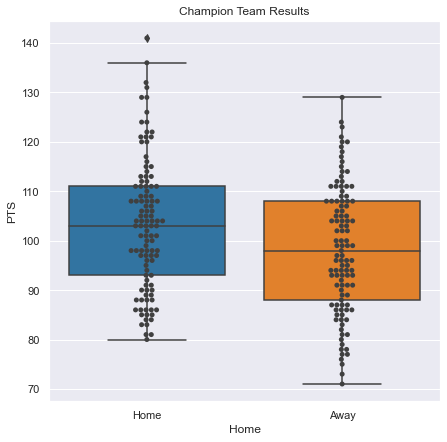

In [12]:
#Box plot of pts
sns.set_theme(style="darkgrid")
pts = sns.boxplot(x="Home", y= "PTS", data=nbaChampion, palette = "tab10")
pts = sns.swarmplot(x="Home", y="PTS", data=nbaChampion, color=".25")
l_plt.set(xlabel='Home/Away', ylabel='Count')
plt.title("Champion Team Results")

Text(0.5, 1.0, '2nd Place Team Results')

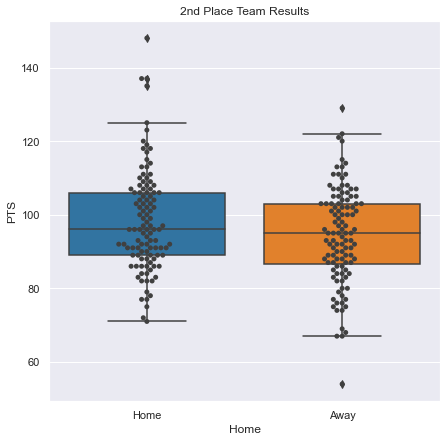

In [64]:
#Box plot of pts
sns.set_theme(style="darkgrid")
pts2 = sns.boxplot(x="Home", y= "PTS", data=nbaRunnerUp, palette = "tab10", order=["Home", "Away"])
pts2 = sns.swarmplot(x="Home", y="PTS", data=nbaRunnerUp, color=".25", order=["Home", "Away"])
l_plt.set(xlabel='Home/Away', ylabel='Count')
plt.title("2nd Place Team Results")

In [13]:
#Adding team efficiency column (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO / MP)

#Getting the number of missed fg and ft, adding that column
nbaChampion["MFG"] = nbaChampion["FGA"] - nbaChampion["FG"]
nbaChampion["MFT"] = nbaChampion["FTA"] - nbaChampion["FT"]

#Getting the total team efficiency score, and caluclating the team efficiency rating 
nbaChampion["TEF"] = nbaChampion["PTS"] + nbaChampion["TRB"] + nbaChampion["AST"] + nbaChampion["STL"] + nbaChampion["BLK"] - nbaChampion["MFG"] - nbaChampion["MFT"] - nbaChampion["TOV"]
nbaChampion["TER"] = nbaChampion["TEF"] / nbaChampion["MP"]
nbaChampion

#Getting the number of missed fg and ft, adding that column
nbaRunnerUp["MFG"] = nbaRunnerUp["FGA"] - nbaRunnerUp["FG"]
nbaRunnerUp["MFT"] = nbaRunnerUp["FTA"] - nbaRunnerUp["FT"]

#Getting the total team efficiency score, and caluclating the team efficiency rating 
nbaRunnerUp["TEF"] = nbaRunnerUp["PTS"] + nbaRunnerUp["TRB"] + nbaRunnerUp["AST"] + nbaRunnerUp["STL"] + nbaRunnerUp["BLK"] - nbaRunnerUp["MFG"] - nbaRunnerUp["MFT"] - nbaRunnerUp["TOV"]
nbaRunnerUp["TER"] = nbaRunnerUp["TEF"] / nbaRunnerUp["MP"]
nbaRunnerUp

,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,AST,STL,BLK,TOV,PF,PTS,MFG,MFT,TEF,TER
0,1980,Sixers,1,Loss,Away,240,40,90,0.444,0,...,28,12,13,14,17,102,50,6,125,0.520833
1,1980,Sixers,2,Win,Away,240,43,85,0.506,0,...,34,14,11,20,21,107,42,6,132,0.550000
2,1980,Sixers,3,Loss,Home,240,45,93,0.484,1,...,34,12,8,13,25,101,48,7,124,0.516667
3,1980,Sixers,4,Win,Home,240,41,79,0.519,0,...,31,5,10,14,20,105,38,3,130,0.541667
4,1980,Sixers,5,Loss,Away,240,42,94,0.447,0,...,32,9,7,12,25,103,52,5,124,0.516667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2017,Cavaliers,5,Loss,Away,240,47,88,0.534,11,...,22,6,5,14,22,120,41,8,130,0.541667
216,2018,Cavaliers,1,Loss,Away,265,44,99,0.444,10,...,18,5,3,11,18,114,55,6,121,0.456604
217,2018,Cavaliers,2,Loss,Away,240,37,90,0.411,9,...,25,9,4,10,15,103,53,6,114,0.475000
218,2018,Cavaliers,3,Loss,Home,240,40,92,0.435,9,...,20,6,4,13,18,102,52,4,110,0.458333


Text(0.5, 1.0, 'Champion Team Results')

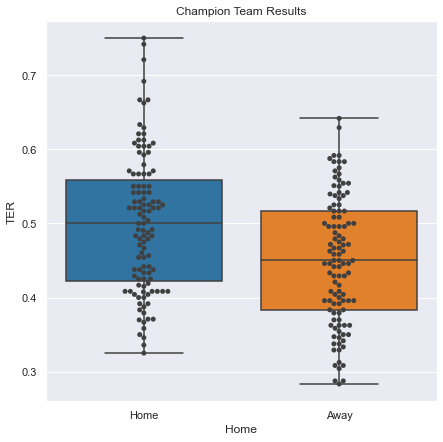

In [67]:
#Box plot of TER
sns.set_theme(style="darkgrid")
ter = sns.boxplot(x="Home", y= "TER", data=nbaChampion, palette = "tab10" )
ter = sns.swarmplot(x="Home", y="TER", data=nbaChampion, color=".25")
l_plt.set(xlabel='Home/Away', ylabel='Count')
plt.title("Champion Team Results")

Text(0.5, 1.0, '2nd Place Team Results')

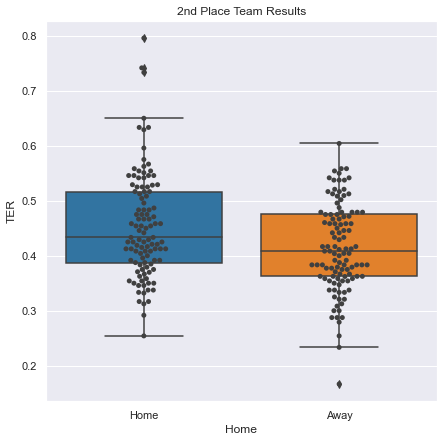

In [68]:
#Box plot of TER
sns.set_theme(style="darkgrid")
ter2 = sns.boxplot(x="Home", y= "TER", data=nbaRunnerUp, palette = "tab10", order=["Home", "Away"] )
ter2 = sns.swarmplot(x="Home", y="TER", data=nbaRunnerUp, color=".25", order=["Home", "Away"])
l_plt.set(xlabel='Home/Away', ylabel='Count')
plt.title("2nd Place Team Results")


Text(0.5, 1.0, 'Champion Team Results')

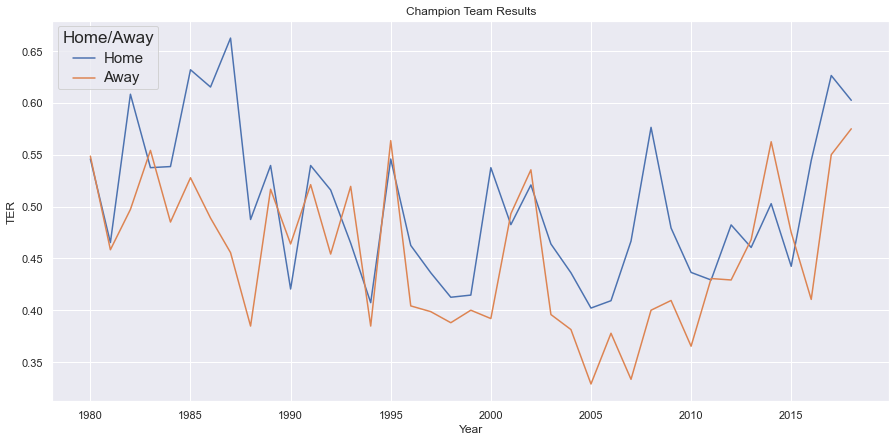

In [14]:
#Line plot for champion teams over time, graphing TER
sns.set(rc={"figure.figsize":(15,7)}) 
time = sns.lineplot(data=nbaChampion, x='Year', y='TER', hue='Home', ci= None)
plt.legend(title="Home/Away")
plt.setp(time.get_legend().get_texts(), fontsize='15') 
plt.setp(time.get_legend().get_title(), fontsize='17')
plt.title("Champion Team Results")

Text(0.5, 1.0, '2nd Place Team Results')

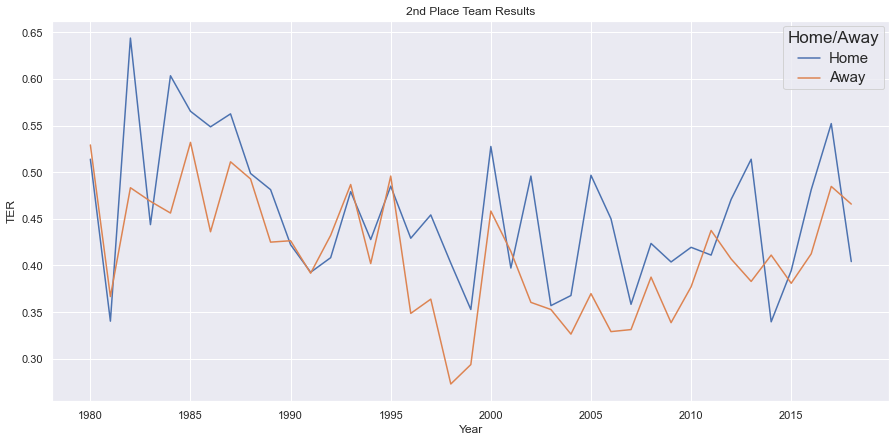

In [74]:
#Line plot for 2nd place teams over time, graphing TER
time2 = sns.lineplot(data=nbaRunnerUp, x='Year', y='TER', hue='Home', hue_order=["Home", "Away"], ci= None)
plt.legend(title="Home/Away")
plt.setp(time2.get_legend().get_texts(), fontsize='15')
plt.setp(time2.get_legend().get_title(), fontsize='17') 
plt.title("2nd Place Team Results")